In [3]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [4]:
annot = pd.read_parquet('ImageDataset/annot.parquet')
imgs = pd.read_parquet('ImageDataset/img.parquet')
img_fns = glob('ImageDataset/train_val_images/train_images/*')

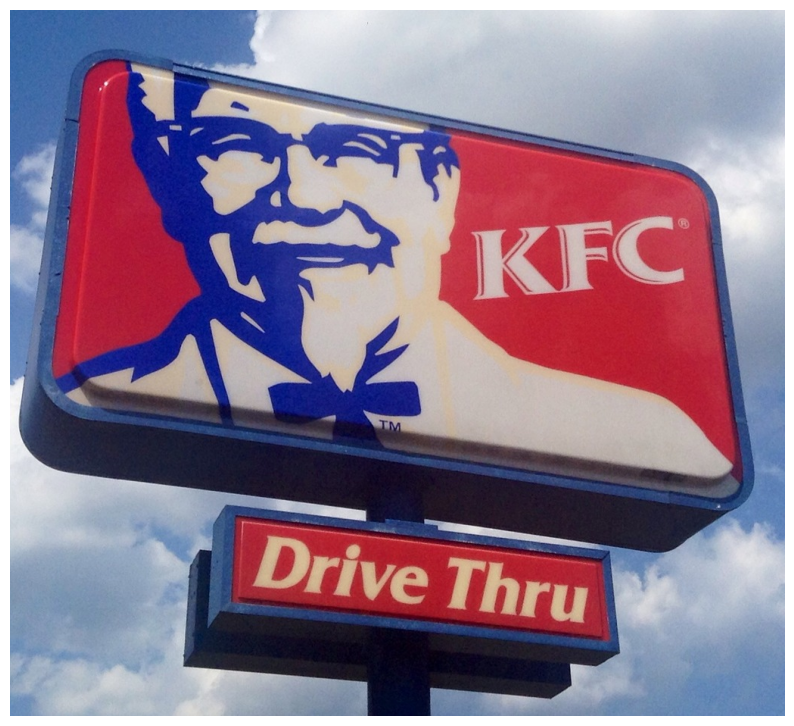

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(img_fns[0]))
ax.axis('off')
plt.show()

In [6]:
image_id = img_fns[0].split('/')[-1].split('.')[0]
annot.query('image_id == @image_id')

id          image_id  \
470238  55e117b610794104_1  55e117b610794104   
470239  55e117b610794104_2  55e117b610794104   
470240  55e117b610794104_3  55e117b610794104   
470241  55e117b610794104_4  55e117b610794104   

                                    bbox utf8_string  \
470238  [601.82, 261.42, 311.04, 128.86]        KFC®   
470239     [482.47, 537.9, 37.77, 22.97]          TM   
470240    [309.4, 683.62, 252.7, 110.81]       Drive   
470241  [566.25, 717.18, 205.18, 100.05]        Thru   

                                                   points      area  
470238  [601.82, 286.3, 902.19, 261.42, 912.86, 363.62...  40080.61  
470239  [482.47, 537.9, 518.2, 542.49, 520.24, 560.87,...    867.58  
470240  [334.61, 683.62, 562.1, 708.83, 550.96, 794.43...  28001.69  
470241  [577.99, 717.18, 771.43, 745.26, 761.23, 817.2...  20528.26

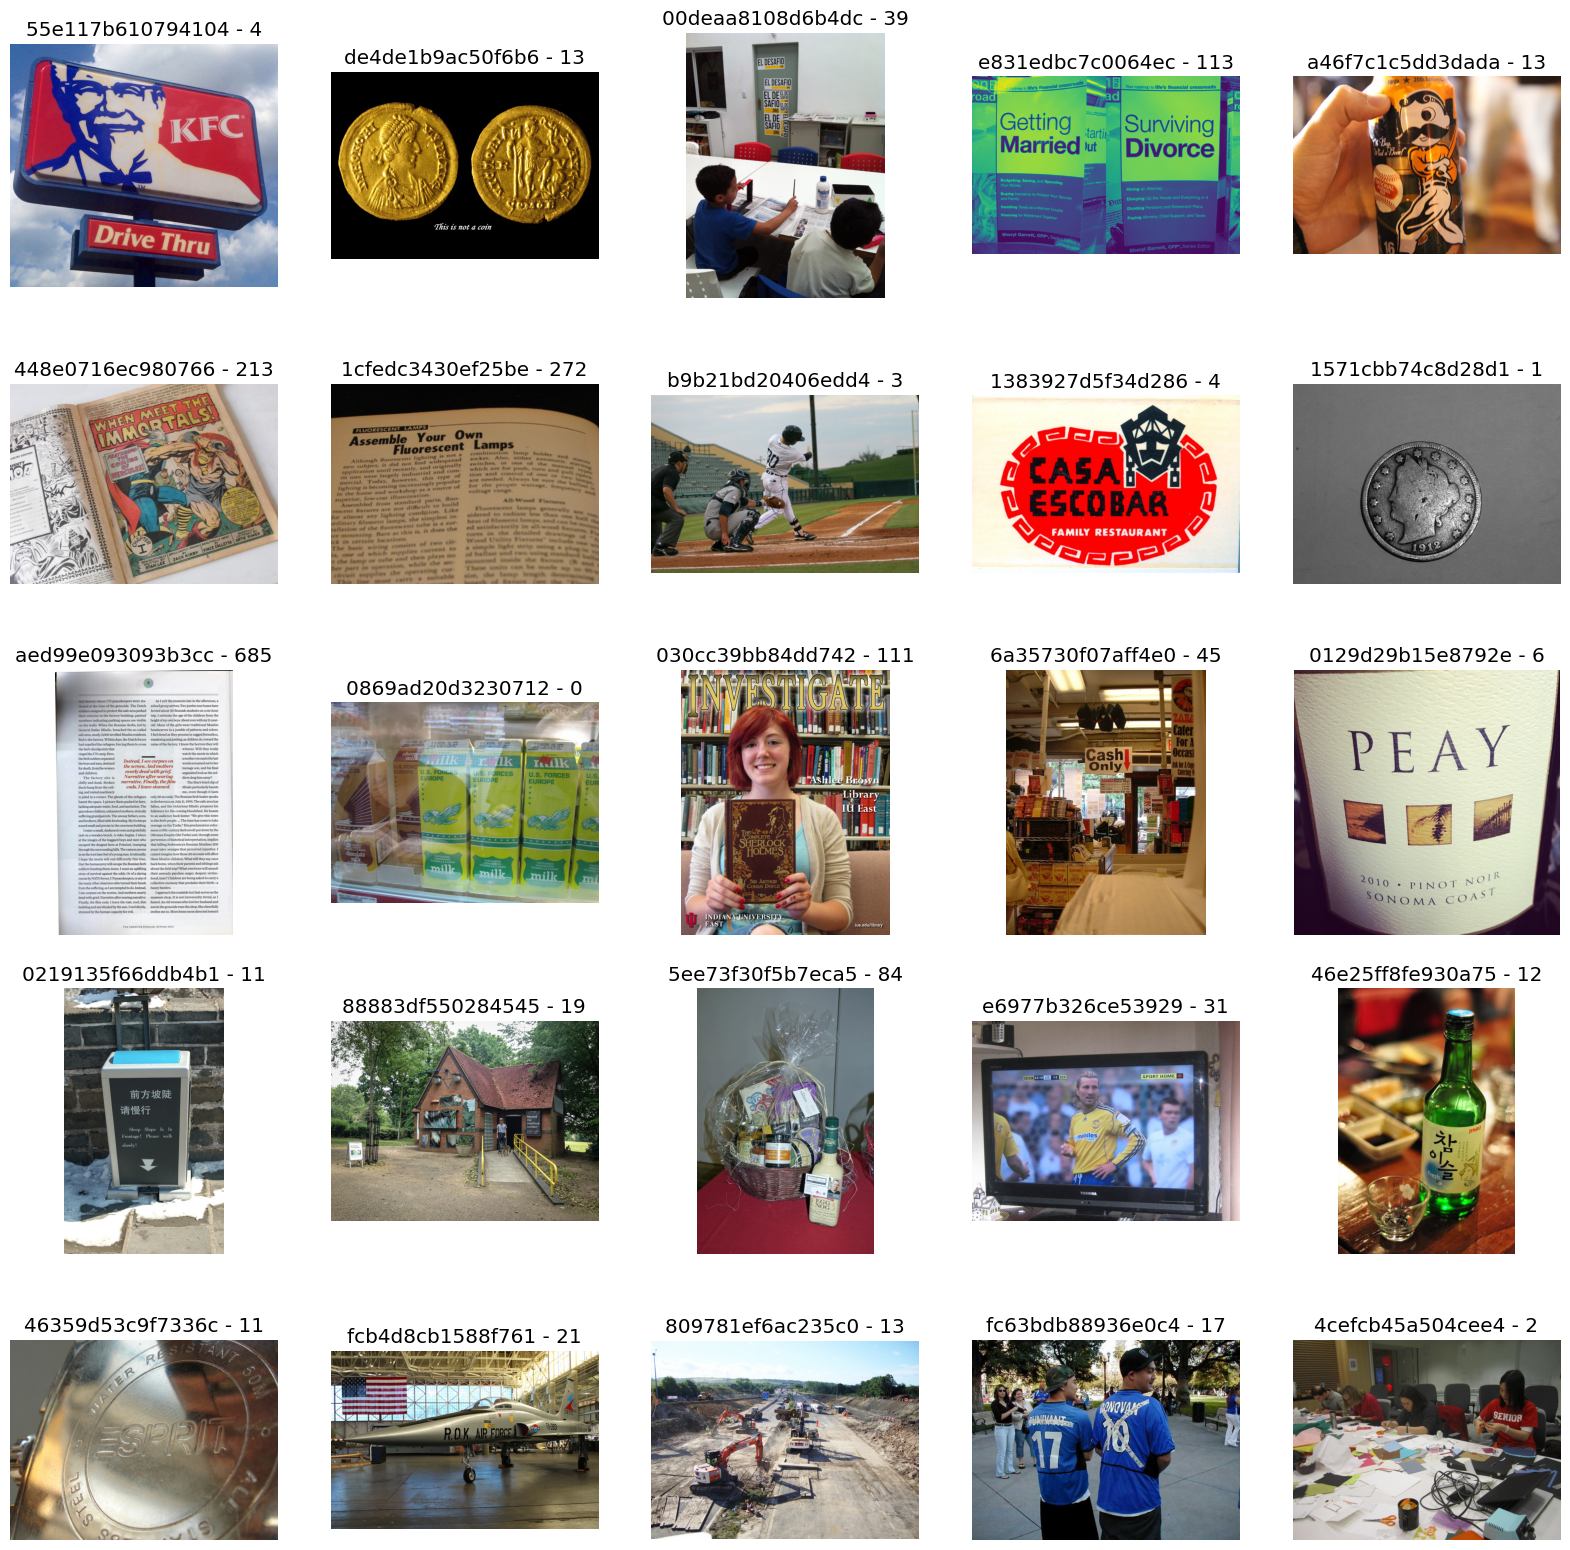

In [7]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis('off')
    image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
    n_annot = len(annot.query('image_id == @image_id'))
    axs[i].set_title(f'{image_id} - {n_annot}')
plt.show()

In [9]:
import pytesseract

# Example call
print(pytesseract.image_to_string(img_fns[11], lang='eng'))

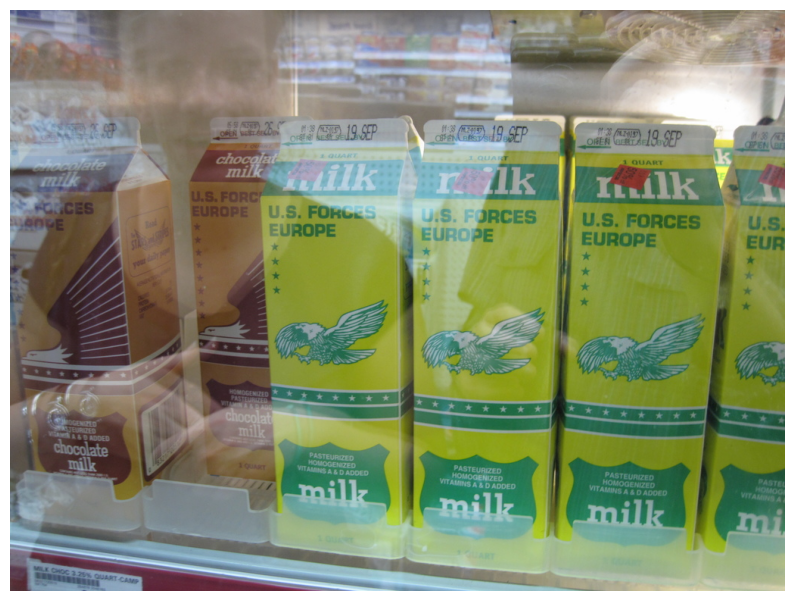

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(img_fns[11]))
ax.axis('off')
plt.show()

In [12]:
import easyocr

reader = easyocr.Reader(['en'], gpu = True)

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |█-------------------------------------------------| 2.2% Complete

Progress: |████----------------------------------------------| 9.5% Complete

Progress: |█████████-----------------------------------------| 19.7% Complete

Progress: |██████████████------------------------------------| 28.9% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |████----------------------------------------------| 9.2% Complete

Progress: |█████████████████████████████████████-------------| 74.4% Complete

Progress: |█████████████████████████████████████████████████-| 98.5% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete